$\rule{800pt}{20pt}$

# Instructions
<br>
<font size="+1">
    <ul>
        <li><b>Recommended Steps</b></li>
        <br>
        <ol>
            <li>Read the prompt and summarize the task in your own words, using as few words as possible for ease of comprehension.</li>
            <br>
            <li>Pretend to be the computer program that you are trying to create. Examine the smaple inputs and manually produce the appropriate results. Afterward, verify the correctness of your logic by comparing with the given sample outputs.</li>
            <br>
            <li>On a scrap piece of paper, write step-by-step instructions so that someone else can pretend to be the computer program and produce the appropriate results for any possible inputs. These instructions should target a human audience who does not know the problem description and only has your instructions as a guide. These instructions should serve as the roadmap for your code.</li>
            <br>
            <li>On another scrap piece of paper, write fragments of Python code to implement each step in your roadmap, focusing especially on the trickiest parts of the logic.</li>
            <br>
            <li>With your roadmap and code fragments from the previous steps, type Python code into a new Jupyter notebook cel to solve the given problem. You should type incrementally and run the code whenever you add a small chunk. This allows you to correct errors as they occur. It may also be helpful to print intermediate results to verify that the code is carrying out the logic as desired.</li>
            <br>
            <li>Run your code with some sample inputs and verify that the outputs are exactly the same as the sample outputs.</li>
            <br>
            <li>Once all of your problems are finished, it is useful to click <i>Kernel</i> $\rightarrow$ <i>Restart & Run All</i> to verify that your outputs for all of your problems continue to be correct. This helps to ensure that someone else will be able to replicate your results when running your notebook.</li>
            <br>
            <font color="red"><li style="color:red">Submit the <i>.ipynb</i> file on TurnItIn on Blackboard by the deadline. Be sure to refresh the page and double check your submission actually went through. <b>Note that you only need to submit your solutions, not all of the other recommended steps.</b> The recommended steps are meant to serve as a guide for your thinking process.</li></font>
            <br>
            <ul style="color:red">
            <font color="red"><li>Do your best to make sure that I will be able to run it.</li>
        <br>
        <li>For example, read in the CSV files from the current directory. I.e., do not write the full path of the file in your code. That will allow me to run your notebook in any directory on my own PC.</li>
        <br>
        <li>Please use Text/Markdown cells to help me understand what you are doing. (I know it may be obvious, but I want to see that you know how to use Text/Markdown.)</li>
        <br>
        <li><b>Some of the questions may be vague, you can either ask me for clarification, or clearly explain your interpretation to the question and your solution to your interpretation</b>. Remember, an important part of being a data scientist is communication and soft skills, so take this as an opportunity to exercise those skills.</li></font>
        <br>
            </ul>
        </ol>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <li><b>Grading</b></li>
        <br>
        <li>There are four possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for $100%$ mastery of the material, as the little details matter in programming.</li>
        <br>
        <ul>
            <li>Grade of $5$ out of $5$ - perfect submission with no significant errors</li>
            <br>
            <li>Grade of $4$ out of $5$ - near perfect submission with one or more significant errors</li>
            <br>
            <li>Grade of $2$ out of $5$ - apparent effort but far from perfect</li>
            <br>
            <li>Grade of $0$ out of $5$ - no submission or no apparent effort</li>
            <br>
        </ul>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

# Before You Begin
<br>
<font size="+1">
    <ul>
        <li>Please read: <b>AUXILLARY_TensorFlow_Introduction.ipynb</b></li>
        <br>
        <li>Please read: <b>01_Demand_Prediction_for_Algorithmic_and_Dynamic_Pricing_Using_Principal_Components_and_Perceptrons.ipynb</b></li>
        <br>
    </ul>
</font>

$\rule{800pt}{20pt}$

# Imports

In [3]:
import os
import os.path
import time
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import cvxpy as cp

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.getcwd()

'/content'

In [5]:
images_path = '/content/drive/My Drive/DSO_464_Spring_2024/Images'

data_path = '/content/drive/My Drive/DSO_464_Spring_2024/01_Fundamentals_of_Machine_Learning_with_TensorFlow_I_EX_Predicting_Demand_with_Sales_Data_for_Dynamic_Pricing/Data'

$\rule{800pt}{20pt}$

# TensorFlow API Questions
<br>
<font size="+1">
  <ul>
    <li><b>Low-level tensor manipulations in TensorFlow APIs.</b></li>
    <br>
    <ul>
      <li><i>Tensors</i>, including special tensors that store the network's state (such as variables).</li>
      <br>
      <li><i>Tensor operations</i>, such as addition, relu, matmul.</li>
      <br>
      <li><i>Backpropagation</i>, a way to compute the gradient of mathematical expressions (implemented via TensorFlow's <i>GradientTape</i> object)</li>
      <br>
    </ul>
  </ul>
</font>

## Tensorflow Introduction

- <b>Watch the video segment from 30 minutes to 1 hour (30:00 to 1:00:00)</b> in the following <a href="https://www.youtube.com/watch?v=tPYj3fFJGjk">tutorial on TensorFlow</a>. This will get you familiar with the very basics of their API.

- Read the notebook: <b>AUXILLARY_TensorFlow_Introduction.ipynb</b> in the same folder as this homework assignment. I strongly suggest you work through the notebook by manually typing in the code, as the notebook does, to get you acquainted with the API.

In [6]:
from IPython.display import HTML

# Watch from 30 min to 60 min
HTML('<iframe width="1000" height="500" src="https://www.youtube.com/embed/tPYj3fFJGjk?si=PFji0XP5uoj2dWSN" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Introductory Questions



- These question are intended to help you work through what a tensor is, and how simple operations are performed using them.

- This section will be a starting point for you to be able to solve more advanced problems in the future.



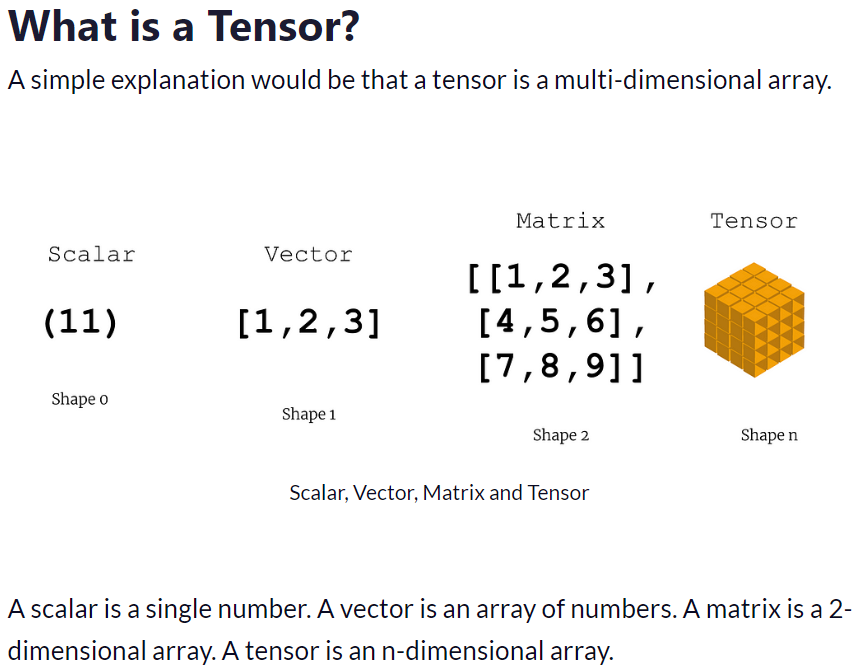

In [7]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'what_is_a_tensor.png')) #img src -  https://www.freecodecamp.org/news/tensorflow-basics/

- First let's try to create a **Scalar** using the TensorFlow API.

In [8]:
scalar = tf.constant(10)

In [9]:
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=10>

- Though it says tf.Tensor - *Suprise* *surprise* - Everything is a tensor in Tensorflow.

- A scalar is nothing but a tensor of no dimension, i.e. a single number.

- Here the **shape** gives you the dimension and **dtype** is what kind of constant we are storing in the tensor.

- The **ndim** tells you whether its:
  - Scalar - 0
  - Vector - 1
  - Matrix - 2
  - Tensor - 3 or more



In [10]:
scalar.shape

TensorShape([])

In [11]:
scalar.dtype

tf.int32

In [12]:
# Number of dimensions in the tensor
scalar.ndim

0

### Question 1

- Create a scalar tensor with a value of 5 (integer).

- Create a scalar with a value of 5.0 (float) and check its dtype and dimension.



In [13]:
# Write your solution / code here

In [14]:
a = tf.constant(5)

print(a)
print(f"the shape is: {a.shape}")
print(f"the type is: {a.dtype}")
print(f"the dimensions are: {a.ndim}")

tf.Tensor(5, shape=(), dtype=int32)
the shape is: ()
the type is: <dtype: 'int32'>
the dimensions are: 0


In [15]:
# Write your solution / code here

In [16]:
b = tf.constant(5.0)

print(b)
print(f"the shape is: {b.shape}")
print(f"the type is: {b.dtype}")
print(f"the dimensions are: {b.ndim}")

tf.Tensor(5.0, shape=(), dtype=float32)
the shape is: ()
the type is: <dtype: 'float32'>
the dimensions are: 0


### Comment
- Both variables have a shape of zero, as they are scalars
- Variable a is of type int32 from numpy while b is instead a float
- Both variables have a dimension of zero

- Next, let's try to create a **Vector** using the TensorFlow API.

In [17]:
vector = tf.constant([10., 15., 20.])

print(vector)
print(vector.ndim)

tf.Tensor([10. 15. 20.], shape=(3,), dtype=float32)
1


- You can see that we've created a vector of size 3 with floats.

### Question 2

- Create a vector of size 5 with integers from 1 to 5.

In [18]:
# Write your solution / code here

In [19]:
c = tf.constant(np.arange(1, 6))

print(c)
print(f"the shape is: {c.shape}")
print(f"the type is: {c.dtype}")
print(f"the dimensions are: {c.ndim}")

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int64)
the shape is: (5,)
the type is: <dtype: 'int64'>
the dimensions are: 1


- Now, let's try to create a **Matrix** using the TensorFlow API.

In [20]:
matrix = tf.constant([
    [1,2],
    [3,4]
])

print(matrix)
print(matrix.ndim)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
2


- You can see we've created a matrix with 2 rows and 2 columns.

### Question 3

- Create a matrix of size 3x3 i.e., create a 3 rows and 3 columns matrix with integers from 1 to 9.

- Create a matrix of shape 3x2 from number from 1 to 6.

In [21]:
# Write a solution / code here.

In [22]:
d = tf.constant(
    np.arange(1, 10).reshape(3, 3)
)

print(d)
print(f"the shape is: {d.shape}")
print(f"the type is: {d.dtype}")
print(f"the dimensions are: {d.ndim}")

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int64)
the shape is: (3, 3)
the type is: <dtype: 'int64'>
the dimensions are: 2


In [23]:
# Write a solution / code here

In [24]:
e = tf.constant(
    np.arange(1, 7).reshape(3, 2)
)

print(e)
print(f"the shape is: {e.shape}")
print(f"the type is: {e.dtype}")
print(f"the dimensions are: {e.ndim}")

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int64)
the shape is: (3, 2)
the type is: <dtype: 'int64'>
the dimensions are: 2


- Now, let's try to create a **Tensor** using the TensorFlow API.

In [25]:
tensor = tf.constant([
    [[1,2]],
    [[3,4]]
])
print(tensor)
print(tensor.ndim)

tf.Tensor(
[[[1 2]]

 [[3 4]]], shape=(2, 1, 2), dtype=int32)
3


### Question 4

- Create a new tensor that takes shape of (3, 1, 3) from integers 1 to 9.

In [26]:
# Write our solution / code here

In [27]:
f = tf.constant(
    np.arange(1,10).reshape(3,1,3)
)

print(f)
print(f"the shape is: {f.shape}")
print(f"the type is: {f.dtype}")
print(f"the dimensions are: {f.ndim}")

tf.Tensor(
[[[1 2 3]]

 [[4 5 6]]

 [[7 8 9]]], shape=(3, 1, 3), dtype=int64)
the shape is: (3, 1, 3)
the type is: <dtype: 'int64'>
the dimensions are: 3


- So far, we have only created tensors of the **Constant** type.

- In programming, constants are usually used if you definitely know that that the values will never change.

- We will now see how to create tensors of the **Variable** type, whose values are allowed to change.

In [28]:
# Everything is the same except you use tf.Variable instead of tf.Constant

var_tensor = tf.Variable([
    [[1,2,3]],
    [[4,5,6]],
    [[7,8,9]]
])


print(var_tensor)

<tf.Variable 'Variable:0' shape=(3, 1, 3) dtype=int32, numpy=
array([[[1, 2, 3]],

       [[4, 5, 6]],

       [[7, 8, 9]]], dtype=int32)>


- Now let's see how to create tensors with different shapes.

- In the below code, we will create a tensor with all zero values and a shape of 2 rows and two columns; we will also specify the data type to be **int32** (which is a 32-bit integer).

In [29]:
tf.zeros(shape=(2,2),dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 0]], dtype=int32)>

### Question 5

- Create a tensor with all zeros of shape 4x3 with data type float16.

In [30]:
# Write your solution / code here

In [31]:
tf.zeros(shape=(4,3), dtype=tf.float16)

<tf.Tensor: shape=(4, 3), dtype=float16, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float16)>

- Let's see how to change value of one row in a tensor.

In [32]:
# Create the tensor variable object
tensor = tf.Variable(tf.zeros(shape=(4,3),dtype=tf.int32))

tensor

<tf.Variable 'Variable:0' shape=(4, 3) dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)>

In [33]:
tensor[1]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 0, 0], dtype=int32)>

In [34]:
# Notice here we are assinging the second row of the matrix
tensor[1].assign([2,2,2])

tensor

<tf.Variable 'Variable:0' shape=(4, 3) dtype=int32, numpy=
array([[0, 0, 0],
       [2, 2, 2],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)>

### Question 6

- Create a matrix of shape 5x4 with all zeros and assign the third row to be all threes.

In [35]:
# Write your solution / code here

In [36]:
g = tf.Variable(tf.zeros(shape=(5,4), dtype=tf.int16))
print(f"before: {g}")

g[2].assign([3]*4)
print(f"\nafter: {g}")

before: <tf.Variable 'Variable:0' shape=(5, 4) dtype=int16, numpy=
array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int16)>

after: <tf.Variable 'Variable:0' shape=(5, 4) dtype=int16, numpy=
array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [3, 3, 3, 3],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int16)>


- Now we will perform some basic arithmetic operations on tensors.

In [37]:
tensor = tf.Variable([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

tensor

<tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)>

In [38]:
# adds a number to each element
tensor + 5

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]], dtype=int32)>

In [39]:
# multiples a number to each element
tensor * 2

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]], dtype=int32)>

In [40]:
tensor / 2

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ],
       [3.5, 4. , 4.5]])>

In [41]:
# Also notice how the above operations did change the tensor variable at all

- Now let's perform some simple statistical operations on tensors

In [42]:
tensor = tf.Variable([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

tensor

<tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)>

In [43]:
# adds all elements in the tensor
tf.reduce_sum(tensor)


<tf.Tensor: shape=(), dtype=int32, numpy=45>

In [44]:
# gives the smallest value out of all elements in the tensor
tf.reduce_min(tensor)


<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [45]:
# gives the mean of all elements in the tensor
tf.reduce_mean(tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

## Advanced Questions


- These question are intended to help you work through how to use tensors to do more advanced calculations.

### Question 7

- Create a 3x3 variable tensor filled with values between 1 and 9 using float32 data type.

- Then perform the following operations in sequence (one after the other) on the same tensor:

  - Multiply each element by 2.
  - Subtract 10 from each element.
  - Find the mean of all elements.

- Use TensorFlow APIs for tensor creation and operations. Write your code below.

In [46]:
# Write your solution / code here

In [47]:
h = tf.Variable(np.arange(1,10).reshape(3,3), dtype=tf.float32)
print(h)

h = h * 2
print(h)

h = h - 10
print(h)

h_mean = tf.reduce_mean(h)
print(h_mean)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)>
tf.Tensor(
[[ 2.  4.  6.]
 [ 8. 10. 12.]
 [14. 16. 18.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[-8. -6. -4.]
 [-2.  0.  2.]
 [ 4.  6.  8.]], shape=(3, 3), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


### Question 8

- Define a TensorFlow variable representing a 4x4 matrix initialized with zeros of type float32.

- Perform the following:
  - Update the second row of the matrix with values [1, 1, 1, 1] (<i>hint: use .assign() method</i>).
  - Calculate the sum of elements in the updated matrix.

- Write your code below.

In [48]:
# Write your solution / code here

In [49]:
g = tf.Variable(tf.zeros(shape=(4,4), dtype=tf.float32))
print(g)

g[1].assign([1]*4)
print(g)

g_sum = tf.reduce_sum(g)
print(g_sum)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>
tf.Tensor(4.0, shape=(), dtype=float32)


- How are tf.Variables are used to store states?

  - In TensorFlow, a **Variable** is a special type of tensor used to store a **mutable** state, such as the weights of a neural network.

  - Unlike a regular constant tensor, which is immutable once created, a Variable allows you to update its value.

  - This makes Variable particularly useful for storing and updating parameters in machine learning models during training.

### Question 9

- Given two tensors A and B of shape (3,3):

  - A = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=tf.float32)

  - B = tf.constant([[9, 8, 7], [6, 5, 4], [3, 2, 1]], dtype=tf.float32)

- Perform the following operations:

  - Element-wise subtraction between A and B. (Eg: A - B)

  - Apply the ReLU activation function to the result (<i>hint: use tf.nn.relu()</i>).

  - Perform matrix multiplication between the result of previous result and its transpose (<i>hint: use tf.matmul() and tf.transpose()</i>).

Write your code below.

In [50]:
#Write your solution / code here

In [51]:
A = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=tf.float32)
B = tf.constant([[9, 8, 7], [6, 5, 4], [3, 2, 1]], dtype=tf.float32)

subtraction = A - B
print(subtraction)  # double check: 1-9=-8, 2-8=-6 etc... looks good

relu = tf.nn.relu(subtraction)
print(relu)  # all values smaller than zero are now zero, as relu(x) is max(0,x)

res = tf.matmul(relu, tf.transpose(relu))
print(res)  # loogs good, eg [4,6,8]@[4,6,8] = 116

tf.Tensor(
[[-8. -6. -4.]
 [-2.  0.  2.]
 [ 4.  6.  8.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 2.]
 [4. 6. 8.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[  0.   0.   0.]
 [  0.   4.  16.]
 [  0.  16. 116.]], shape=(3, 3), dtype=float32)


### Question 10

- Use TensorFlow's GradientTape to compute the gradient of a simple function with respect to its input:

  - Define a function f(x) = x^2.
  - Compute the derivative of f at x = 3.
  - Now compute the derivative by hand and compare it with this result.
  - Discuss how GradientTape is useful in training neural networks. (A single paragraph shall suffice.)

Write your code and explanation below.

In [52]:
# Write your solution / code here

In [53]:
f = lambda x: x**2
x = tf.Variable(3, dtype=tf.float32)

In [54]:
with tf.GradientTape() as g:
  g.watch(x)
  y = f(x)

dy_dx = g.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

The derivative is correct. Indeed we have the function *f(x)=x^2*. The derivative is *f'(x)=2x*. When the derivative is evaluated at 3, we have *f'(3)=2x3=6* which is the same result as tensorflow.

Derivatives are constantly used during the training of a neural network. Indeed, we usually define a loss function, which could be a MSE, Cross Entropy or other type of losses. These measure the accuracy of our model, usually taking a transformation of the difference between the label and the prediction. Once the loss is defined, it is all about solving an optimization problem with the goal of minimising that loss. Given that derivatives are very hard to compute in a neural networks, there are algorithms to compute them efficiently, one of these is backpropagation. It is like solving the derivatives using the chain rule, but in a more efficient way because we perform a forward pass, compute the values and then compute the derivatives backward as an in induction step. After gradients have been computed through these algorithm, then we can use numerical methods to minimize the loss. One of these is gradient descent (or usually SGD), which is used to adjust the weights by moving in the direction opposite to the gradient (which points to the steepest increase direction). So, overall, derivatives are the most important mathematical tool we have to train neural networks because they allow us to minimize the loss, or in general to perfom any optimization task.


## Extra-Practice Question: You Do NOT Need to Complete this Question

- This question is optional, but it is good practice, so feel free to complete it!

Now lets implement forward propagation of a small neural network using TensorFlow API.

To achieve it, follow the steps below and compute the predictions:

* a) Define X as a random array of size 5 with each element between 1 and 5.
* b) The hidden layer has size of 10 and apply relu.
* c) The output layer has size of 1 and apply sigmoid.

In [55]:
# Try your solution / code here.

In [104]:
X = tf.constant(np.random.uniform(1, 5, size=(1,5)))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", name="h1"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output"),
])

model.build(X.shape)
model.predict(X)

1/1 [==============================] - 0s 231ms/step


array([[0.8158871]], dtype=float32)

$\rule{800pt}{20pt}$

# Keras API Questions
<br>
<font size="+1">
  <ul>
    <li><b>High-level deep learning concepts in Keras Sequential API.</b></li>
    <br>
    <ul>
      <li><i>Layers</i>, which are combined into a model.</li>
      <br>
      <li><i>Loss function</i>, which defines the feedback signal used for learning.</li>
      <br>
      <li><i>Optimizer</i>, which determines how learning is conducted.</li>
      <br>
      <li><i>Metrics</i>, to evaluate model performance.</li>
      <br>
      <li><i>Training loops</i>, that performs some type of gradient descent, such as mini-batch SGD.</li>
      <br>
    </ul>
  </ul>
</font>

### Context

You are working on a deep learning project to Predict Mileage (Mile per gallon - MPG) using regression.
* Your task is to build a neural network using Keras Sequential API to accomplish this.

* Model Building:
  * Construct a neural network using Keras Sequential API to mimick a simple regression (i.e. a single layer perceptron).
  * Use the normalizer layer provided.
  * Include a description of each layer you add and explain its purpose in the network.

* Loss Function and Optimizer:
  * Choose an appropriate loss function for this regression task and justify your choice.
  * Select an optimizer and explain why it is suitable for your model.

* Training and Evaluation:
  * Implement a training loop to train your model on the dataset.
  * Explain the role of epochs and batch size in the training process.

* Analysis:
  * After training, provide an analysis of your model’s performance.
  * Discuss any potential improvements or alterations that could be made to the model to enhance its performance.

### Setup

Steps Peformed for you:

1.   Data Extraction
2.   Data Cleaning
3.   Data Analysis (EDA)



In [57]:
# Data Extraction
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [58]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [59]:
dataset.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [60]:
# Data Cleaning
dataset.isna().sum() # checking for null or incomplete values

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [61]:
dataset['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [62]:
dataset.dropna(inplace=True)

In [63]:
#Splitting of Data
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

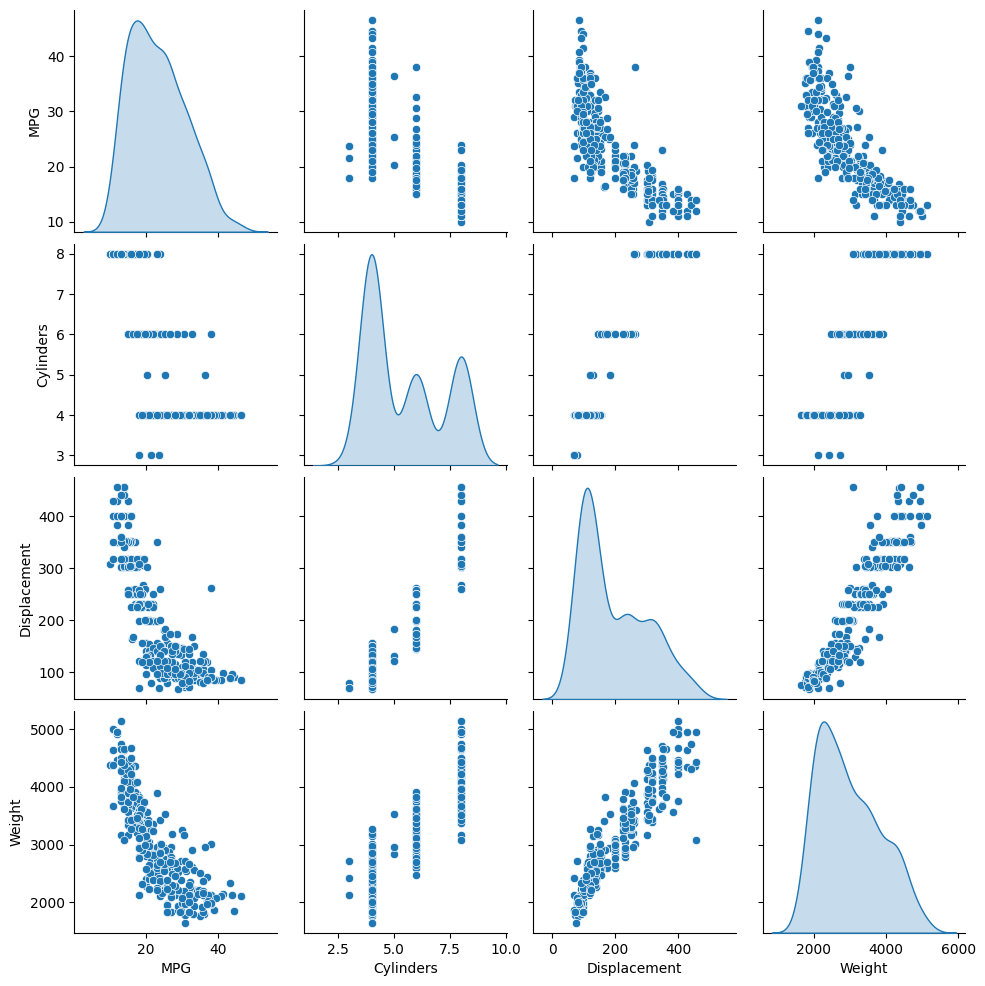

In [64]:
# EDA
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [65]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0


### Model Building

In [66]:
normalizer = tf.keras.layers.Normalization(axis=-1)

#### Question 11

- Define your model using the following empty Keras code.

In [67]:
# # Define the model
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1, name="output")
])

I chose 1 layer with 1 neuron because you said we have to mimic a basic regression, so a perceptron was the choice. However, one could implement any type of multilayer perceptron, or fully connected NN, which is the same of a fancy regression as long as we don't introduce any non-linearity through ReLU, drop-out etc.

#### Question 12

- Compile your model using the following empty code, you need to specify an optimizer (use the Adam algorithm) and a loss function (use mean squared error) using Keras code.

- Recall ADAM stands for: ADAptive Moment estimation

In [68]:
# Compile the model
# Fill appropriate functions / names inplace of None
linear_model.compile(optimizer='adam', loss='mse')

#### Question 13

- Train your model using Keras' built-in training loop (<i>use .fit()</i>) using the training set. Set the epochs to 10 and batch size to 32, and use a validation split of 0.2.

- Use the code below to plot the loss vs the number epochs during training.

In [69]:
# Train the model
history = linear_model.fit(train_dataset, train_labels, epochs=10, batch_size=32, validation_split = 0.2)

Epoch 1/10
8/8 [==============================] - 1s 42ms/step - loss: 4235430.0000 - val_loss: 4256469.0000
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 4120495.7500 - val_loss: 4140422.5000
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 4006273.5000 - val_loss: 4026668.7500
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 3896220.2500 - val_loss: 3914378.7500
Epoch 5/10
8/8 [==============================] - 0s 11ms/step - loss: 3787414.7500 - val_loss: 3804352.0000
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 3680796.0000 - val_loss: 3696492.2500
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 3576216.5000 - val_loss: 3590908.5000
Epoch 8/10
8/8 [==============================] - 0s 10ms/step - loss: 3473664.2500 - val_loss: 3487673.2500
Epoch 9/10
8/8 [==============================] - 0s 9ms/step - loss: 3373701.7500 - val_loss: 3386722.5000
Epoch 10/10
8/8 [=====

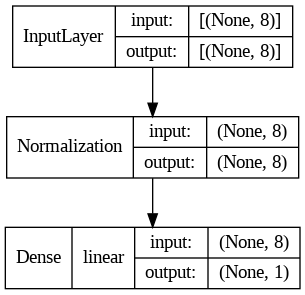

In [70]:
tf.keras.utils.plot_model(linear_model, show_layer_activations=True, show_shapes=True, show_layer_names=False)

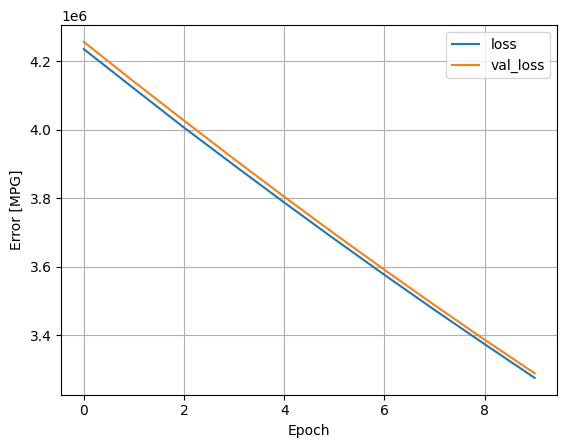

In [71]:
# # Use this code to plot the loss vs the number epochs during training
def plot_loss(history):
   plt.plot(history.history['loss'], label='loss')
   plt.plot(history.history['val_loss'], label='val_loss')
   plt.xlabel('Epoch')
   plt.ylabel('Error [MPG]')
   plt.legend()
   plt.grid(True)

plot_loss(history)

#### Question 14

- Make some adaptations (maybe add a few layers, try different epochs, try different batch sizes, try different optimizers, etc.) to try to get the Loss in Validation to below 100.

- Just try your best and **experiment** with this problem.



In [78]:
n_epochs = [5, 10, 20, 100] # usually the more the better, unless we are overfitting, I don't run huge humbers bc it becomes slow
batch_sizes = [1, 8, 32, 64]  # depends on data size, but smaller batch is usually better but less efficient
optimizer_names = ["SGD", "Adam"] # sgd is the stochastic version of gd, adam is adaptive instead


def generate_model():
  model = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(10, activation='relu', name="h1"),  # here I am adding one hidden layer with a ReLu activation function
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='relu', name="h2"),  # here I am another one hidden layer with a ReLu activation function
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1, name="output"),
  ])
  return model

# a comment: I use the ReLu activation function to add non-linearity to the model. This is what actually makes NN go boom, otherwise it would be just a fancy regression.
# We could use also use other activation functions such as the sigmoid or the hyperbolic tangent

def get_optimizer(optimizer_name):
  if optimizer_name == "SGD":
      return tf.keras.optimizers.SGD(learning_rate=0.0001)
  elif optimizer_name == "Adam":
      return tf.keras.optimizers.Adam()

In [208]:
def param_grid_search():

  best_params = [None, None, None]
  best_loss = np.inf

  for n_epoch in n_epochs:
    for batch_size in batch_sizes:
      for optimizer_name in optimizer_names:

        print(f"\ntrying a new model with hyper-params {n_epoch, batch_size, optimizer_name}")
        model = generate_model()
        model.compile(optimizer=get_optimizer(optimizer_name), loss='mse')
        history = model.fit(train_dataset, train_labels, epochs=n_epoch, batch_size=batch_size, validation_split = 0.2)

        if history.history['val_loss'][-1] < best_loss:
          print("NEW BEST MODEL FOUND")
          best_loss = history.history['val_loss'][-1]
          best_params = [n_epoch, batch_size, optimizer_name]

  return best_params


params = param_grid_search()


trying a new model with hyper-params (5, 1, 'SGD')
Epoch 1/5
251/251 [==============================] - 2s 4ms/step - loss: 5185836316035579270660096.0000 - val_loss: 47167047720427847680.0000
Epoch 2/5
251/251 [==============================] - 1s 4ms/step - loss: 44885297210001981440.0000 - val_loss: 42661007177243688960.0000
Epoch 3/5
251/251 [==============================] - 1s 3ms/step - loss: 40597285424559292416.0000 - val_loss: 38585535387496611840.0000
Epoch 4/5
251/251 [==============================] - 1s 3ms/step - loss: 36718903293114318848.0000 - val_loss: 34899268723749683200.0000
Epoch 5/5
251/251 [==============================] - 1s 3ms/step - loss: 33210999405625212928.0000 - val_loss: 31565267993356140544.0000
NEW BEST MODEL FOUND

trying a new model with hyper-params (5, 1, 'Adam')
Epoch 1/5
251/251 [==============================] - 2s 4ms/step - loss: 165857.4219 - val_loss: 305.5268
Epoch 2/5
251/251 [==============================] - 1s 3ms/step - loss: 40509

In [209]:
print(params)

[100, 1, 'Adam']

In [73]:
params = [100, 1, "Adam"] # i got this by cross validation, and "hard-code it" to avoid training when restarting the notebook

## Some comments:
- SGD seems to suffer a lot from numerical instability. I should defintely play with the learning rate and explore more, but Adam seems to perform pretty well so I skip this.
- The best result (lowest loss) is obtained with the highest number of epochs, and the lowest batch size. This makes sense, as the more epochs, the more trained the model. The low batch_size helps the model generalize better, although with bigger data we would have to make it higher to achieve computational efficiency.  

In [79]:
n_epochs = params[0]
batch_size = params[1]
optimizer = get_optimizer(params[2])

# Train the model
best_model = generate_model()
best_model.compile(optimizer=optimizer, loss='mse')
history = best_model.fit(train_dataset, train_labels, epochs=n_epochs, batch_size=batch_size, validation_split = 0.2)

Epoch 1/100
251/251 [==============================] - 1s 3ms/step - loss: 56047.4648 - val_loss: 165.4224
Epoch 2/100
251/251 [==============================] - 1s 2ms/step - loss: 22367.4434 - val_loss: 306.4751
Epoch 3/100
251/251 [==============================] - 1s 2ms/step - loss: 9876.7559 - val_loss: 356.7867
Epoch 4/100
251/251 [==============================] - 1s 2ms/step - loss: 6367.9170 - val_loss: 282.5779
Epoch 5/100
251/251 [==============================] - 1s 2ms/step - loss: 3768.3560 - val_loss: 201.5213
Epoch 6/100
251/251 [==============================] - 1s 2ms/step - loss: 2674.6274 - val_loss: 162.5584
Epoch 7/100
251/251 [==============================] - 1s 2ms/step - loss: 2007.6825 - val_loss: 136.1336
Epoch 8/100
251/251 [==============================] - 1s 2ms/step - loss: 1167.5286 - val_loss: 160.9476
Epoch 9/100
251/251 [==============================] - 0s 2ms/step - loss: 981.3174 - val_loss: 187.1646
Epoch 10/100
251/251 [=======================

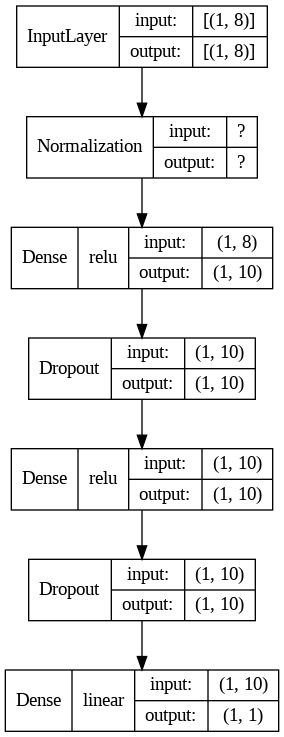

In [80]:
tf.keras.utils.plot_model(best_model, show_layer_activations=True, show_shapes=True, show_layer_names=False)

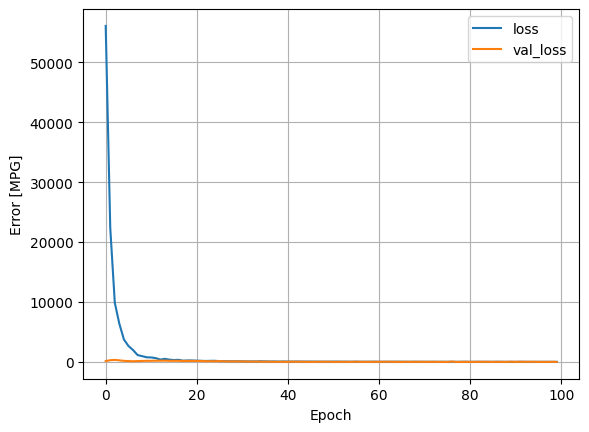

In [81]:
plot_loss(history)

In [96]:
# after having trained the model and chosen the best parameters on the validation loss, it is time to test it
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# this is a summary of the performace of the basic, perceptron model.
y_pred_linear = linear_model.predict(test_dataset)

mae = mean_absolute_error(test_labels, y_pred_linear)
mse = mean_squared_error(test_labels, y_pred_linear)
rmse = mean_squared_error(test_labels, y_pred_linear, squared=False)
r2 = r2_score(test_labels, y_pred_linear)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

3/3 [==============================] - 0s 4ms/step
Mean Absolute Error: 1696.7409779084032
Mean Squared Error: 3127153.892130388
Root Mean Squared Error: 1768.3760607207926
R-squared: -47883.10998906636


In [97]:
# this is the final model
y_pred = best_model.predict(test_dataset)

mae = mean_absolute_error(test_labels, y_pred)
mse = mean_squared_error(test_labels, y_pred)
rmse = mean_squared_error(test_labels, y_pred, squared=False)
r2 = r2_score(test_labels, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

3/3 [==============================] - 0s 4ms/step
Mean Absolute Error: 3.8315229269174425
Mean Squared Error: 22.01245130713518
Root Mean Squared Error: 4.691742885872496
R-squared: 0.6629373942317388


### Context - Answers

* Loss Function and Optimizer:
  * Throghout the training of all different models, I have used the mean squared error (MSE), defined as the square of the difference between the prediction and the actual label. I chose this measure because we are dealing with a regression task, and it is one of the most common losses. Another choice could have been the mean absolute error (MAE), which is commonly used when we don't want outliers to skew our predictions. In general, all losses for regression could have been used.
  * The final optimizer chosen was Adam optimizer, which is just an adaptation of stochastic gradient descent, which exploit momentum to automatically update the learning rate to speed up computations. I also tried SGD, but it seemed pretty unstable, and as previously mentioned i should have probably explored different learning rates. However, Adam does this for use, so I used Adam directly.

* Training and Evaluation:
  * The number of epochs is the amount of times that we loop over the whole dataset during the training. Usually, the higher the number of epochs, the better the model performance. However, we must check that the model is not overfitting. This is why we train on the train but test the performance on the validation and on the test, and choose the best model based on the latter. Epochs are different from the batch size, which is instead the number of samples that is observed by the model before updating the parameters. Low batch size allow for better generalizatio, as the model updates parameter for each sample. Higher batch sizes are more efficient instead, as they allow for parallelization and less computations. In both cases, for epochs and batch size, we face trade-offs and must find a balance through cross validation.

* Analysis:
  * Overall, the model seems to generalize pretty well. The test loss is pretty low (altough this measure is relative to the problem) and close to the validation loss. The R-squared is around 66%. The accuracy of this model, when compared to the base case of the perceptron, is very good. However, there are multiple ways to perform this model. We could devote more time to EDA and feature engineering. WE could change the NN architecture, increasing the number of layers of the number of units. We could change other hyper-parameters, such as the activation functions, the optimizers, the loss, the learning rates and others. We could also test more classic ML models as we have few observations, maybe a random forest or a gradient boosting would perfom pretty well in this case as well.

$\rule{800pt}{20pt}$

## Extra-Practice Question: You Do NOT Need to Complete this Question

- This question is optional, but it is good practice, so feel free to complete it!


In [ ]:
# Context:
  # You are working on a deep learning project to classify images of handwritten digits (0-9).
  # Your task is to build a neural network using Keras Sequential API to accomplish this.

# Model Building:
  # Construct a neural network using Keras Sequential API.
  # The network should have at least one hidden layer.
  # Include a description of each layer you add and explain its purpose in the network.

# Loss Function and Optimizer:
  # Choose an appropriate loss function for this classification task and justify your choice.
  # Select an optimizer and explain why it is suitable for your model.

# Training and Evaluation:
  # Implement a training loop to train your model on the MNIST dataset.
  # Explain the role of epochs and batch size in the training process.
  # Choose appripriate metrics to evaluate the performance of your model and justify your choices.

# Analysis:
  # After training, provide an analysis of your model’s performance.
  # Discuss any potential improvements or alterations that could be made to the model to enhance its performance.

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# # Load MNIST dataset
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
# # Normalize the images
# train_images = train_images / 255.0
# test_images = test_images / 255.0

In [ ]:
# # Define the model
# model = tf.keras.models.Sequential([
#     # Write your code here
# ])

In [ ]:
# # Compile the model
# # Fill appropriate functions / names inplace of None
# model.compile(optimizer=None,  # optimizer
#               loss=None,  # Loss function
#               metrics=None) # Metric to monitor

In [ ]:
# # Train the model
# history = model.fit(None, None, epochs=None, batch_size=None,
#                     validation_data=(None, None))

In [ ]:
# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(test_images, test_labels)
# print(f'Test accuracy: {test_accuracy}')

# # Save model structure and weights
# # model.save('mnist_model.h5')

In [ ]:
# Now try to acheive the accuracy above x %. and write what changes made to the model perform better.

$\rule{800pt}{20pt}$

# Even More Practice Examples: You Do NOT Need to Complete These Questions But it is a Good Idea to Read Through Them
<br>
<font size="+1">
  <ul>
    <li>Using TensorFlow like NumPy</li>
    <br>
    <li>A tensor is similar to a NumPy <i>ndarray</i>.</li>
    <br>
    <li>In order to create any custom components in deep-learning applications, we need to be able to manipulate tensors.</li>
    <br>
  </ul>
</font>

## <h2>Tensorflow and Operations</h2>
<br>
<font size="+1">
  <ul>
    <li>To create a tensor, use <i>tf.constant()</i>.</li>
    <br>
    <li>In addition to the various tensor operations, many of the methods and attributes of the NumPy's <i>ndarray</i> object are also implemented in the <i>tf.constant</i> class, including indexing.</li>
    <br>
  </ul>
</font>

In [ ]:
# 2x3 matrix
matrix = tf.constant([
                      [1,2,3],
                      [4,5,6]
                  ])

matrix

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
matrix.shape

TensorShape([2, 3])

In [ ]:
matrix.dtype

tf.int32

In [ ]:
matrix[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [5, 6]], dtype=int32)>

In [ ]:
matrix[:, 1:2]

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[2],
       [5]], dtype=int32)>

In [ ]:
# elementwise addition
matrix+10

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]], dtype=int32)>

In [ ]:
# elementwise simple function mapping
tf.square(matrix)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)>

In [ ]:
matrix**2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)>

In [ ]:
# matrix multplication
matrix @ tf.transpose(matrix)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 32],
       [32, 77]], dtype=int32)>

In [ ]:
# TF interacts nicely with NumPy
numpy_matrix = matrix.numpy()

tf.square(numpy_matrix)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)>

In [ ]:
np.square(matrix)

array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)

In [ ]:
# TF does not perform type conversions automatically
# So you cannot add a float tensor and an integer tensor

# tf.constant(2.) + tf.constant(2)

In [ ]:
# You also cannot add a 32-bit float and a 64-bit float tensor

# tf.constant(2.) + tf.constant(2., dtype=tf.float64)

In [ ]:
# To fix these errors, you can use tf.cast()
lower_precision_float = tf.constant(2.)
higher_precision_float = tf.constant(2., dtype=tf.float64)

lower_precision_float + tf.cast(higher_precision_float, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [ ]:
# So far, we've only seen immutable tensors, which can be good for data, but not so good for variables that need to be optimized over

variable_matrix = tf.Variable([
    [1,2,3],
    [4,5,6]
])

variable_matrix

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
# You can change the variable's values by using the 'assign()' method
# Direct assignment will not work

variable_matrix[:,0].assign([1000, 4000])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[1000,    2,    3],
       [4000,    5,    6]], dtype=int32)>

In [ ]:
# In practice, you will rarely have to create variables manually as Keras will take care of it for you

# TF's other data structures include:
# sparse tensors (tensors with mostly zeros), tensor arrays (lists of tensors with the same shape),
# ragged tensors (lists of tensors with the same rank and data type, but different shapes), string tensors (represent byte strings 'cafe' = b"caf\xc3\xa9")
# sets, and queues (store tensors across multiple steps)

# Being comfortable with Tensors, Operations, Variables, and Data Structures will allow you to create your own customized deep-learning algorithms and models.